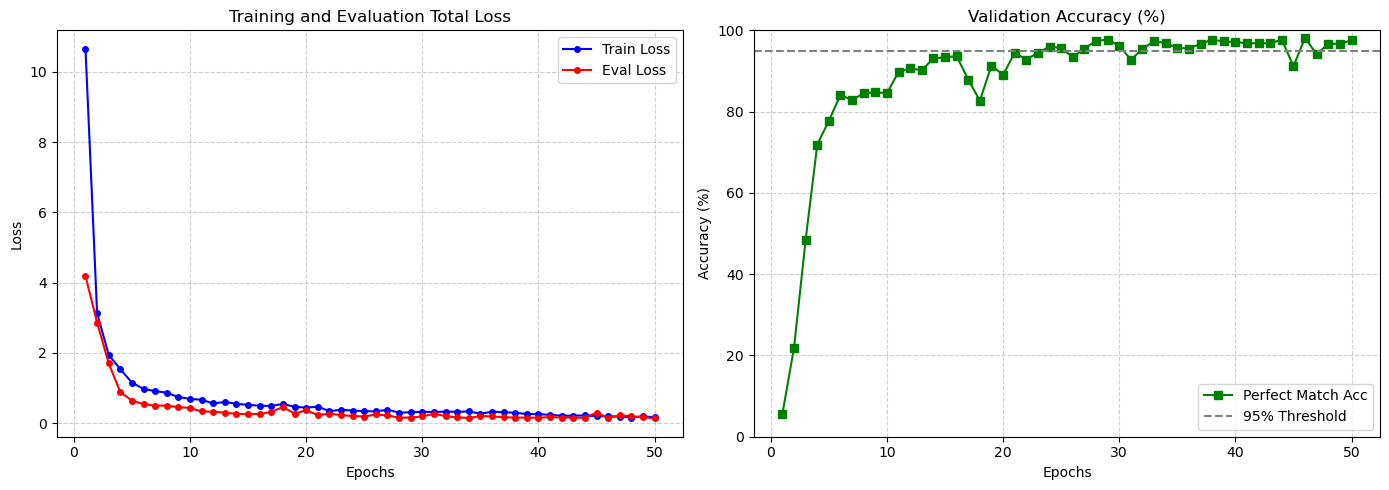

In [11]:
import json
import matplotlib.pyplot as plt

with open("training_history.json", "r") as f: 
    history = json.load(f)

train_total_loss = [epoch_dict['total'] for epoch_dict in history['train_losses']]
eval_total_loss = [epoch_dict['total'] for epoch_dict in history['eval_losses']]
accuracies = [a * 100 for a in history['accuracies']]
epochs = range(1, len(train_total_loss) + 1)

plt.figure(figsize=(14, 5))

# Plot 1: Loss Curves
plt.subplot(1, 2, 1)
plt.plot(epochs, train_total_loss, 'b-o', label='Train Loss', markersize=4)
plt.plot(epochs, eval_total_loss, 'r-o', label='Eval Loss', markersize=4)
plt.title('Training and Evaluation Total Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()

# Plot 2: Accuracy Curve
plt.subplot(1, 2, 2)
plt.plot(epochs, accuracies, 'g-s', label='Perfect Match Acc')
plt.axhline(y=95, color='gray', linestyle='--', label='95% Threshold')
plt.title('Validation Accuracy (%)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.ylim(0, 100) # Keep scale consistent
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()

plt.tight_layout()
plt.show()

Final Eval Losses after 50 epochs:
  Color:  0.0188
  Number: 0.0286
  Shape:  0.0853
  Fill:   0.0065


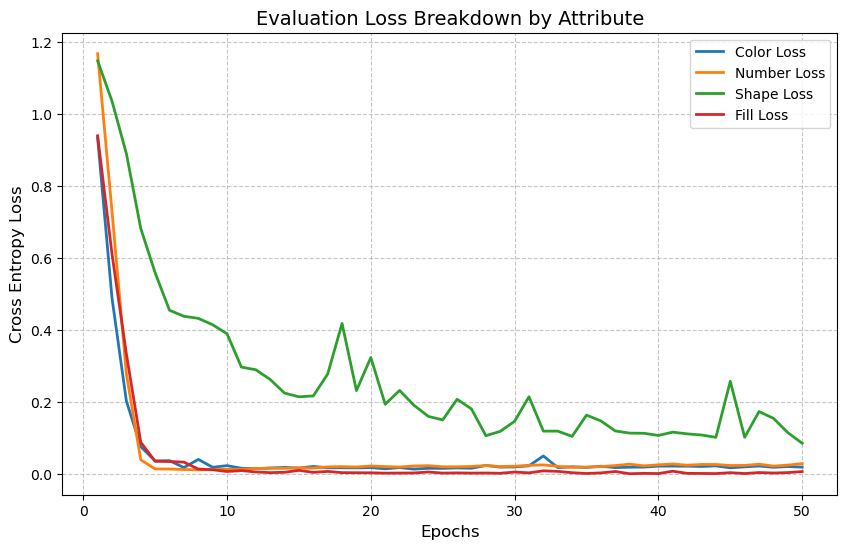

In [12]:
import json
import matplotlib.pyplot as plt

# 1. Load the history
with open("training_history.json", "r") as f:
    history = json.load(f)

eval_losses = history['eval_losses']
epochs = range(1, len(eval_losses) + 1)

# 2. Extract individual attribute losses
# We use eval_losses because it's the best measure of actual learning
color_loss = [e['color'] for e in eval_losses]
number_loss = [e['number'] for e in eval_losses]
shape_loss = [e['shape'] for e in eval_losses]
fill_loss = [e['fill'] for e in eval_losses]

# 3. Plotting
plt.figure(figsize=(10, 6))

plt.plot(epochs, color_loss, label='Color Loss', linewidth=2)
plt.plot(epochs, number_loss, label='Number Loss', linewidth=2)
plt.plot(epochs, shape_loss, label='Shape Loss', linewidth=2)
plt.plot(epochs, fill_loss, label='Fill Loss', linewidth=2)

plt.title('Evaluation Loss Breakdown by Attribute', fontsize=14)
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Cross Entropy Loss', fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)

# Highlight the final values in the terminal for a quick check
print(f"Final Eval Losses after {len(epochs)} epochs:")
print(f"  Color:  {color_loss[-1]:.4f}")
print(f"  Number: {number_loss[-1]:.4f}")
print(f"  Shape:  {shape_loss[-1]:.4f}")
print(f"  Fill:   {fill_loss[-1]:.4f}")

plt.show()